In [0]:
from sklearn.linear_model import LinearRegression
#from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro

In [0]:
com=pd.read_csv("computers.csv")
com.isna().sum()

Units      0
Minutes    1
dtype: int64

In [0]:
com

,Units,Minutes
0,1,NaN
1,2,29.0
2,3,49.0
3,4,64.0
4,4,74.0
5,5,87.0
6,6,96.0
7,6,97.0
8,7,109.0
9,8,119.0


In [0]:
com.fillna(23,inplace=True)


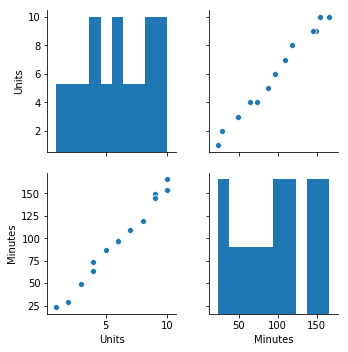

In [0]:
sns.pairplot(com)


Text(0, 0.5, 'Minutes')

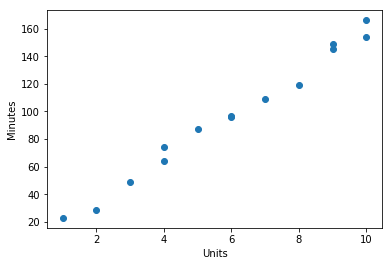

In [0]:
plt.scatter(com["Units"],com["Minutes"])
plt.xlabel('Units')
plt.ylabel('Minutes')

In [0]:
com['Minutes'].corr(com['Units'])

0.9936987461308753

In [0]:
model=LinearRegression()
model.fit(X=com[['Units']],y=com[['Minutes']])
print(model.intercept_)
print(model.coef_)


[4.16165414]
[[15.50877193]]


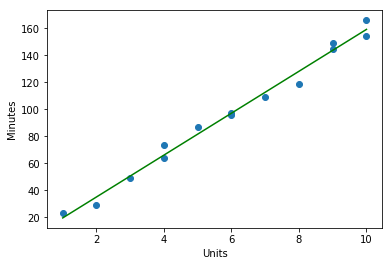

In [0]:
plt.scatter(com["Units"],com["Minutes"])
plt.xlabel('Units')
plt.ylabel('Minutes')
x=com[['Units']]
m=model.coef_
c=model.intercept_
y=m*x+c
plt.plot(x,y,'green')
plt.show()

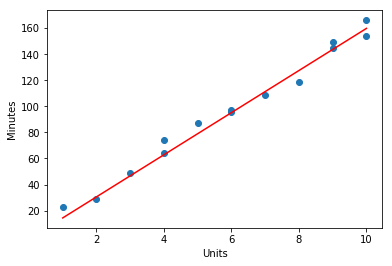

In [0]:
plt.scatter(com["Units"],com["Minutes"])
plt.xlabel('Units')
plt.ylabel('Minutes')
x=com.loc[:,["Units"]]
y=model.predict(x)
plt.plot(x,y,color='red')
plt.show()

## Splitting Data into training and test set 

In [0]:
from sklearn.model_selection import train_test_split
# Splitting into training and testing data
X_train, X_test, y_train,y_test = train_test_split(com[['Units']],com[['Minutes']], test_size = 0.25)

In [0]:
X_test.shape

(4, 1)

In [0]:
model=LinearRegression()
model.fit(X_train,y_train)
print(model.intercept_)
print(model.coef_)

[2.54455446]
[[15.68316832]]


In [0]:
y_preds=model.predict(X_test)

In [0]:
train_accuracy=model.score(X_train,y_train) # accuracy(score) of model
print(train_accuracy)
test_accuracy=model.score(X_test,y_test)
print(test_accuracy)

0.9770368368544555
0.9224698136064813


In [0]:
from sklearn.metrics import r2_score
print(r2_score(y_preds,y_test))

0.8997151916896233


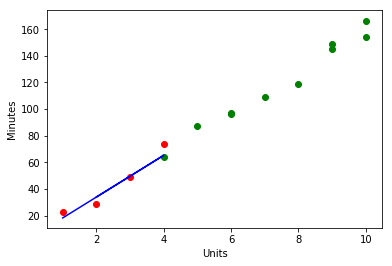

In [0]:
plt.scatter(X_test,y_test,color='red')
plt.scatter(X_train,y_train,color='green')
plt.xlabel('Units')
plt.ylabel('Minutes')
x=X_test
y=model.predict(x)
plt.plot(x,y,color='blue')
plt.show()

## Cars 93


In [0]:
car=pd.read_csv("Cars93.csv")
car.head()
car.columns


Index(['col.no', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')

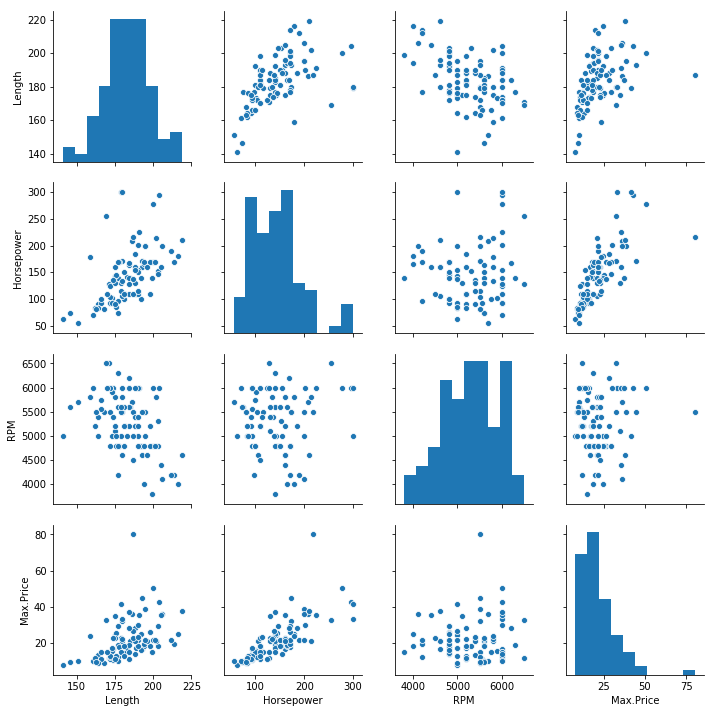

In [0]:
sns.pairplot(car,vars=['Length','Horsepower','RPM','Max.Price'])

In [0]:
for i in ['Length','Horsepower','RPM','Max.Price','EngineSize']:
    print(i,shapiro(car[i]))
    

Length (0.9909828305244446, 0.7838887572288513)
Horsepower (0.9358058571815491, 0.00019156414782628417)
RPM (0.9739203453063965, 0.059240180999040604)
Max.Price (0.8478083610534668, 2.397128007203264e-08)
EngineSize (0.9360973238945007, 0.00019901638734154403)


In [0]:
car[['Length','Horsepower','RPM','Max.Price','EngineSize']].corr(method='spearman')

,Length,Horsepower,RPM,Max.Price,EngineSize
Length,1.000000,0.644366,-0.423088,0.559092,0.811376
Horsepower,0.644366,1.000000,-0.058742,0.821571,0.814176
RPM,-0.423088,-0.058742,1.000000,-0.073437,-0.529503
Max.Price,0.559092,0.821571,-0.073437,1.000000,0.674233
EngineSize,0.811376,0.814176,-0.529503,0.674233,1.000000


In [0]:
model_car=LinearRegression()
a=np.asarray(car["EngineSize"])
b=np.asarray(car["Length"])
a.reshape(-1,1)
b.reshape(-1,1)

array([[177],
       [195],
       [180],
       [193],
       [186],
       [189],
       [200],
       [216],
       [198],
       [206],
       [204],
       [182],
       [184],
       [193],
       [198],
       [178],
       [194],
       [214],
       [179],
       [203],
       [183],
       [203],
       [174],
       [172],
       [181],
       [175],
       [192],
       [180],
       [174],
       [202],
       [141],
       [171],
       [177],
       [180],
       [179],
       [176],
       [192],
       [212],
       [151],
       [164],
       [175],
       [173],
       [185],
       [168],
       [172],
       [166],
       [184],
       [200],
       [188],
       [191],
       [205],
       [219],
       [164],
       [172],
       [184],
       [190],
       [169],
       [175],
       [187],
       [166],
       [199],
       [172],
       [190],
       [170],
       [181],
       [190],
       [188],
       [188],
       [190],
       [194],
       [201],
      

In [0]:
model_car.fit(X=car[["EngineSize"]],y=car[["Length"]])
print(model_car.intercept_)
print(model_car.coef_)

[153.90286186]
[[10.98361083]]


In [0]:
y=model_car.predict(x)

In [0]:
acc=model_car.score(X=car[["EngineSize"]],y=car[["Length"]])
acc

0.6088417254217691

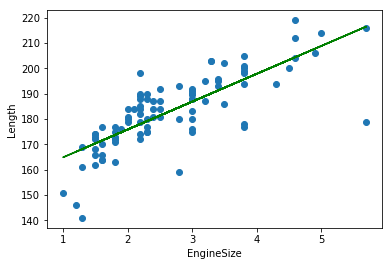

In [0]:
x=car[["EngineSize"]]
y=model_car.predict(x)
plt.xlabel("EngineSize")
plt.ylabel("Length")
plt.scatter(car["EngineSize"],car["Length"])
plt.plot(x,y,color="green")
plt.show()